In [1]:

import uproot	
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
from scipy import stats
from utils.fit_linear_regression_model import fit_linear_regression_model
import sklearn
import seaborn as sns
import pandas as pd
import mplhep
mplhep.style.use(["LHCbTex2"])

plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [2]:
def round(n, k):
    # function to round number 'n' up/down to nearest 'k'
    # use positive k to round up
    # use negative k to round down

    return n - n % k

In [3]:
file = uproot.open(
    "/work/cetin/Projektpraktikum/tracking_losses_ntuple_B_zmag.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
    # "/work/cetin/LHCb/lb-stack/data/tracking_losses_ntuple_test_endVelo2endT.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) &
                   (allcolumns.fromB)]  # B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) &
                  (allcolumns.fromB)]  # B: 1466

electrons = allcolumns[(allcolumns.isElectron)
                       & (allcolumns.fromB)
                       & (allcolumns.eta < 5.0)
                       & (allcolumns.eta > 2.0)
                       # & (np.abs(allcolumns.phi) < 3.142)
                       ]

print(ak.num(found, axis=0), ak.num(lost, axis=0))
print(ak.num(electrons, axis=0))
# ak.count(found, axis=None)

40402 10099
48290


In [4]:
rad_length_found = ak.to_numpy(found["rad_length_frac"])
eta_found = ak.to_numpy(found["eta"])
phi_found = ak.to_numpy(found["phi"])
rad_length_lost = ak.to_numpy(lost["rad_length_frac"])
eta_lost = ak.to_numpy(lost["eta"])
phi_lost = ak.to_numpy(lost["phi"])

eta_a = ak.to_numpy(electrons["eta"])
phi_a = ak.to_numpy(electrons["phi"])
rad_length_frac_a = ak.to_numpy(electrons["rad_length_frac"])

stretch_factor = ak.num(eta_lost, axis=0) / ak.num(eta_found, axis=0)
print("stretch factor: ", stretch_factor)

stretch factor:  0.24996287312509283


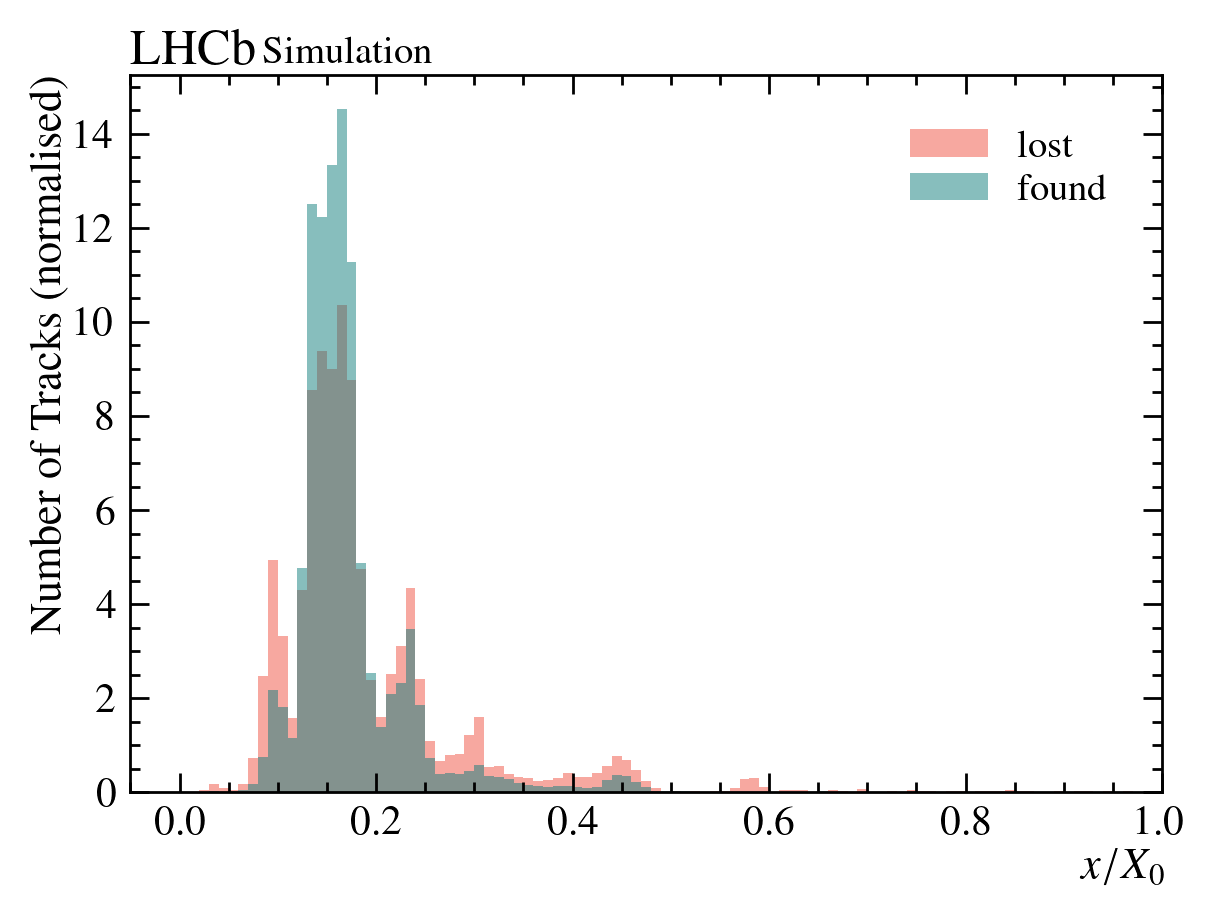

In [5]:
plt.hist(
    rad_length_lost,
    bins=100,
    density=True,
    alpha=0.5,
    color="#F05342",
    histtype="bar",
    label="lost",
    range=[0, 1],
)
plt.hist(
    rad_length_found,
    bins=100,
    density=True,
    alpha=0.5,
    color="#107E7D",
    histtype="bar",
    label="found",
    range=[0, 1],
)
plt.xlim(-0.05, 1)
# plt.yscale("log")
# plt.title("radiation length fraction endVelo2endUT")
plt.xlabel(f"$x/X_0$")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/rad_length_frac_lost_found_endVelo2endUT.pdf",
#     format="PDF")

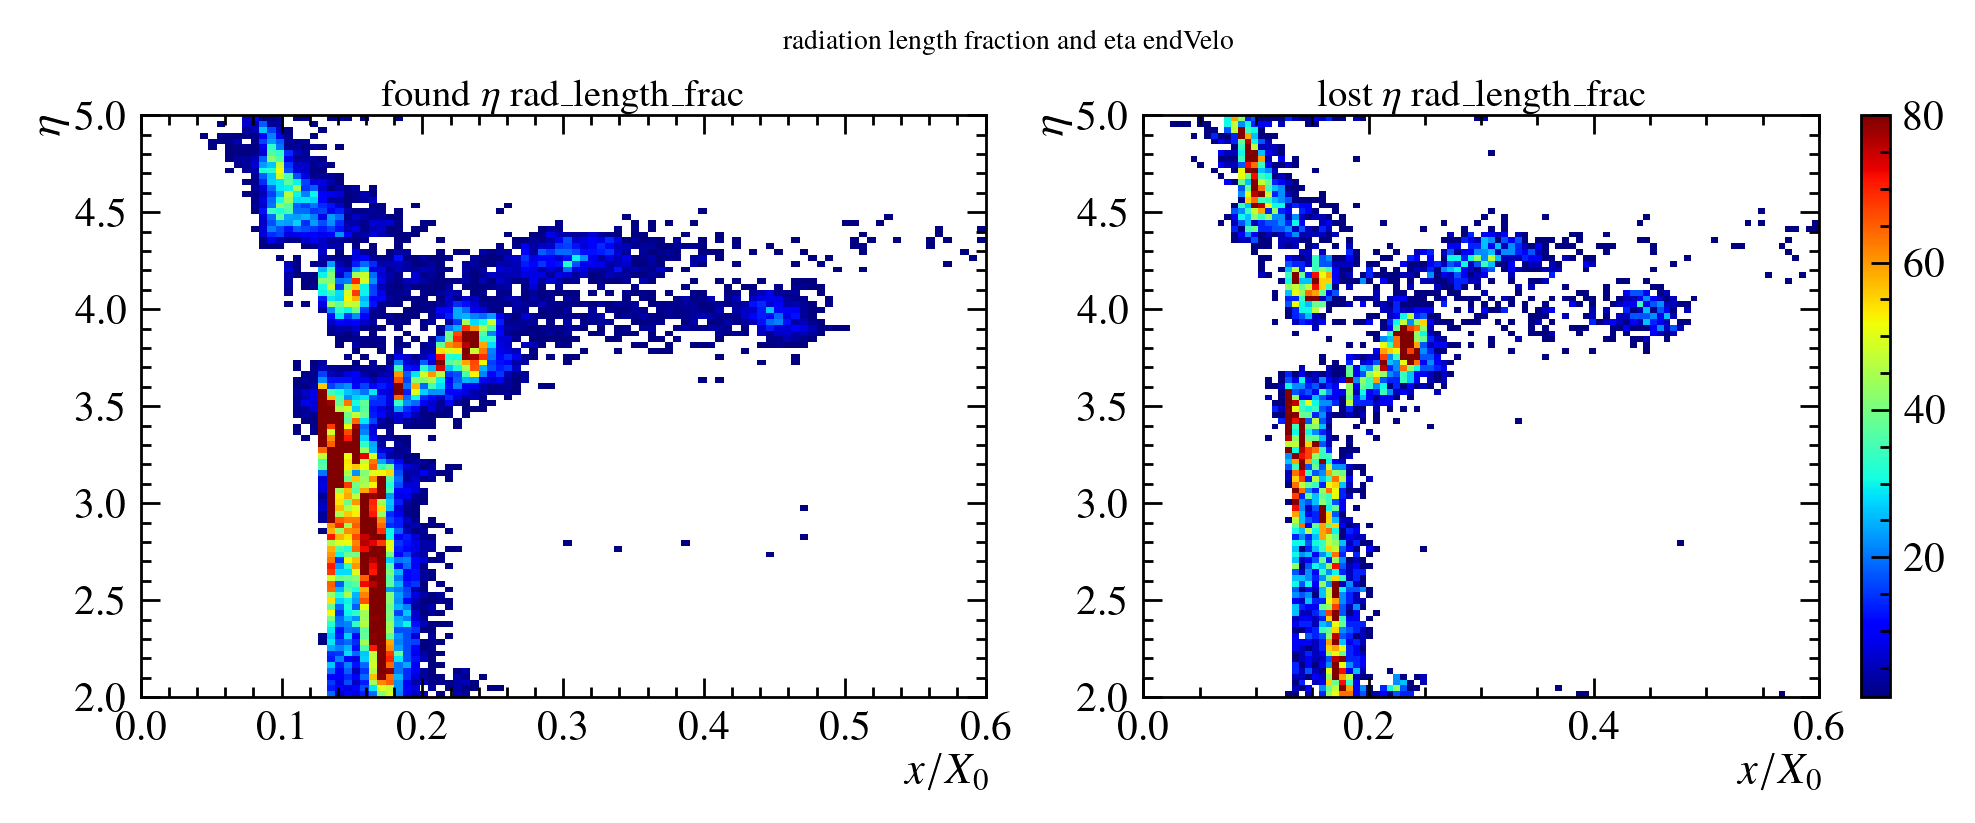

In [6]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

a0 = ax0.hist2d(
    rad_length_found,
    eta_found,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.6], [2, 5]],
)
ax0.set_xlabel(f"$x/X_0$")
ax0.set_ylabel(f"$\eta$")
ax0.set_title(f"found $\eta$ rad_length_frac")

a1 = ax1.hist2d(
    rad_length_lost,
    eta_lost,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[0, 0.6], [2, 5]],
)
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel(f"$\eta$")
ax1.set_title(f"lost $\eta$ rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.suptitle("radiation length fraction and eta endVelo")
plt.colorbar(a0[3], ax=ax1)

plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.19432666451166924, 'x': -0.00010136532791187516, 'y': -0.00022209404990607013, 'tx': 0.058480207541052064, 'ty': 0.18599542917589618, 'qop': -17.657405901936546, 'x^2': 1.2271024867047469e-05, 'x y': 5.376824972059055e-08, 'x tx': -0.025941371835257743, 'x ty': 0.014328015524776564, 'x qop': -0.38410998543244235, 'y^2': -1.8261507968709735e-05, 'y tx': -0.014951077113227147, 'y ty': 0.02154311538810164, 'y qop': -0.008987663050567057, 'tx^2': 9.180854607357592, 'tx ty': 0.1873064867954838, 'tx qop': -0.47120712928737807, 'ty^2': -6.787398610853974, 'ty qop': -0.05031041352613623, 'qop^2': 0.24778641944197533, 'x^3': -5.992321693190818e-09, 'x^2 y': -2.649404482539432e-07, 'x^2 tx': 5.42176741002125e-06, 'x^2 ty': 0.0020253771536145383, 'x^2 qop': 0.003955288970107154, 'x y^2': 2.8906882704270233e-09, 'x y tx': -0.0016493773782229844, 'x y ty': 0.0005067592007986898, 'x y qop': -0.0031813438496783404, 'x tx^2': 0.0022653

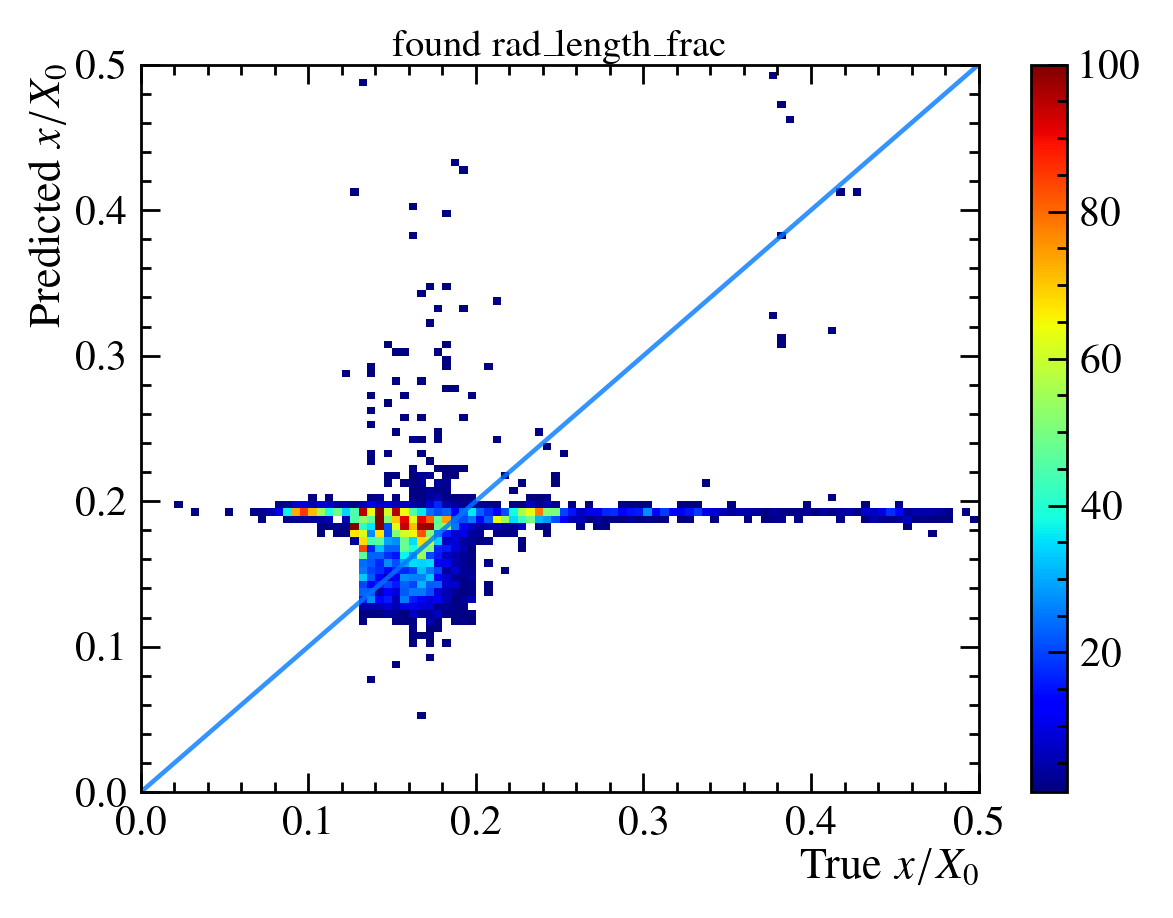

In [7]:
rad_length_frac = found["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = found["ideal_state_770_tx"]
    slopey = found["ideal_state_770_ty"]
    x = found["ideal_state_770_x"]
    y = found["ideal_state_770_y"]
    qop = found["ideal_state_770_qop"]
elif state == 2:
    slopex = found["ideal_state_9410_tx"]
    slopey = found["ideal_state_9410_ty"]
    x = found["ideal_state_9410_x"]
    y = found["ideal_state_9410_y"]
    qop = found["ideal_state_9410_qop"]

data = ak.zip({
    "rad_length_frac": rad_length_frac,
    "x": x,
    "y": y,
    "tx": slopex,
    "ty": slopey,
    "qop": qop,
})
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 100

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
plt.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"found rad_length_frac")

plt.colorbar(a0[3])
plt.show()

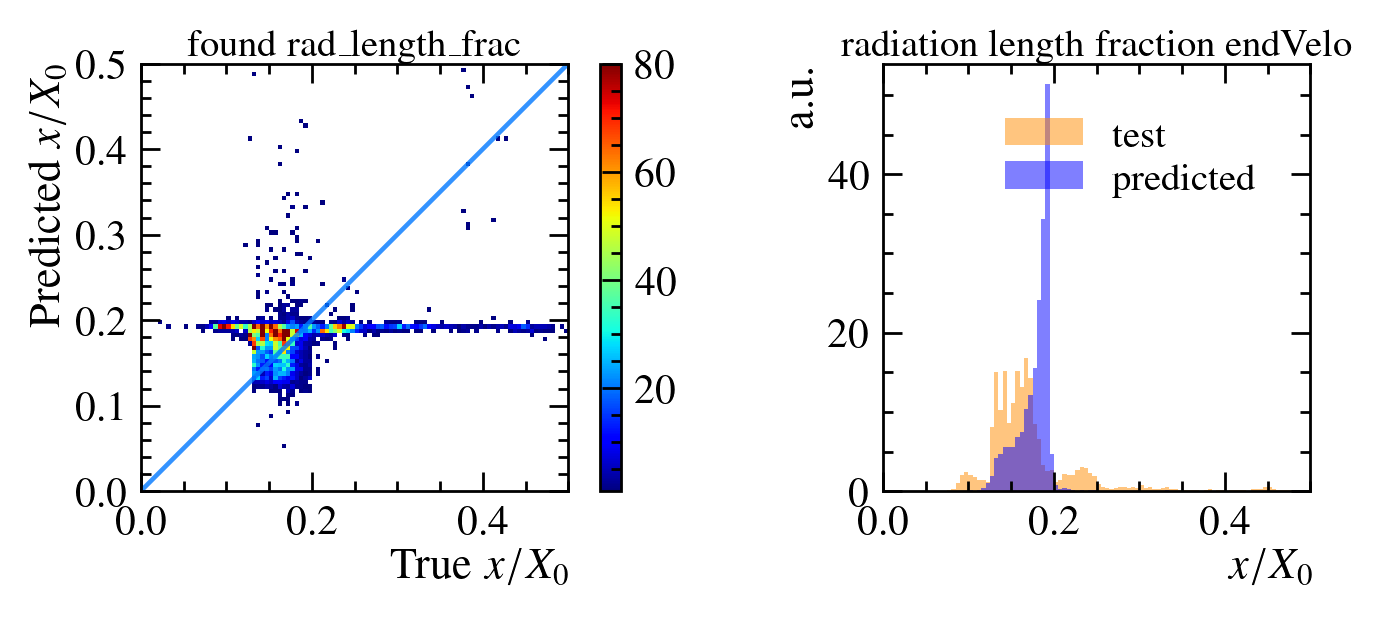

In [8]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ax0.set_aspect("equal")

a0 = ax0.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
ax0.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
ax0.set_box_aspect(1)
ax0.set_xlabel(f"True $x/X_0$")
ax0.set_ylabel(f"Predicted $x/X_0$")
ax0.set_title(f"found rad_length_frac")
plt.colorbar(a0[3], ax=ax0)

ax1.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
ax1.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
ax1.set_xlim(0, 0.5)
ax1.set_title("radiation length fraction endVelo")
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel("a.u.")
ax1.set_box_aspect(1)

ax1.legend()

# plt.gca().set_aspect("equal")
plt.show()

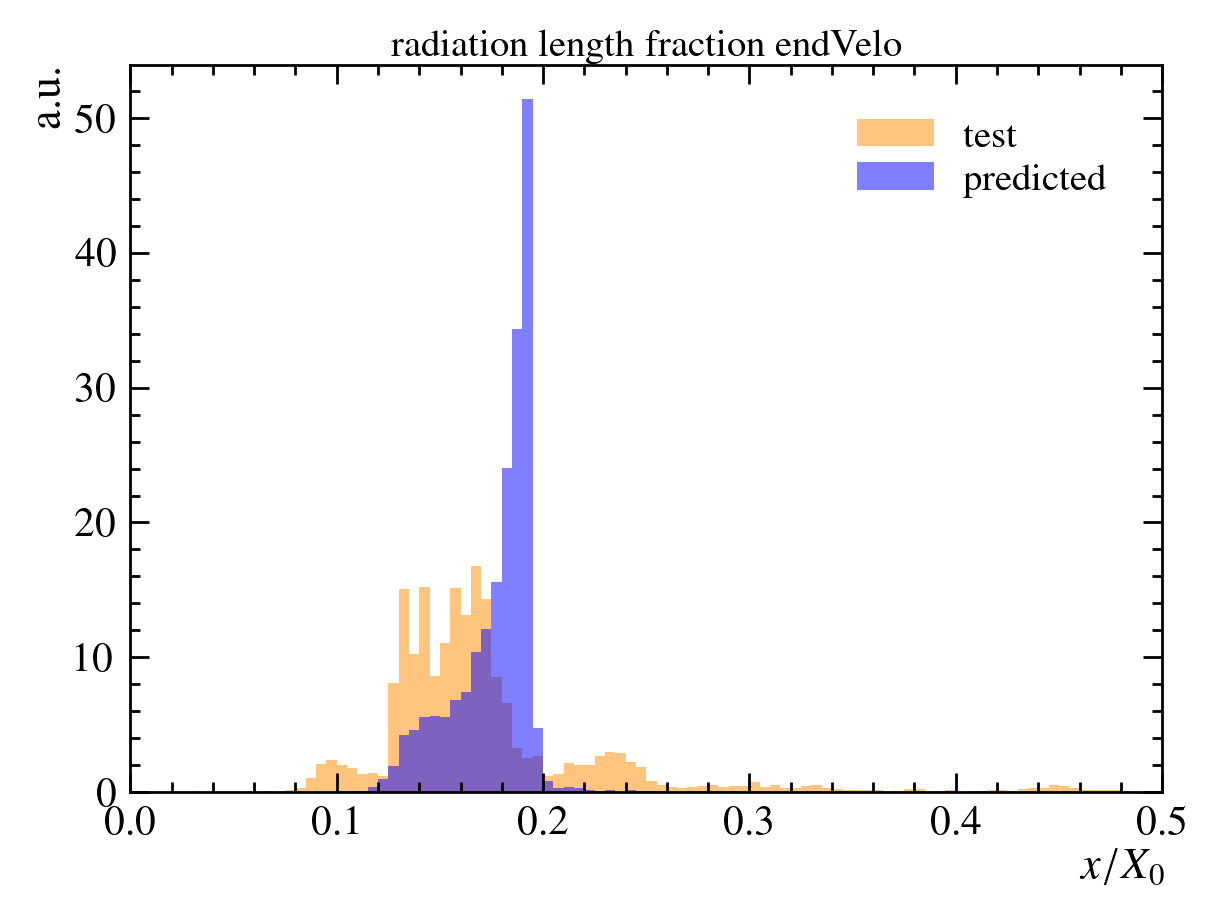

In [9]:
plt.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
plt.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
plt.xlim(0, 0.5)
# plt.yscale("log")
plt.title("radiation length fraction endVelo")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")

plt.legend()
plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.24562140630345797, 'x': -0.0006147519300623754, 'y': 0.00013149294035773212, 'tx': 0.40993139584024857, 'ty': -0.17613130993997955, 'qop': -2.431621847221756, 'x^2': -2.537929422256502e-05, 'x y': 1.6503609236837168e-05, 'x tx': 0.014114349319941343, 'x ty': -0.015914217992780068, 'x qop': -0.3138750804691517, 'y^2': 8.004082295422125e-06, 'y tx': -0.0007103518977325451, 'y ty': -0.012102735170731998, 'y qop': -0.01613366131755978, 'tx^2': -1.1805199392607937, 'tx ty': 2.630285174738731, 'tx qop': 0.2259863956524285, 'ty^2': -0.9000770143303645, 'ty qop': 0.035317808178541486, 'qop^2': 0.506257028947111, 'x^3': -1.054613771280784e-06, 'x^2 y': -7.542919321773425e-07, 'x^2 tx': 0.0016046817739745617, 'x^2 ty': 0.0041420285105903745, 'x^2 qop': 0.021289920901612722, 'x y^2': 1.6630958165414549e-06, 'x y tx': -0.0029322410866066016, 'x y ty': 0.00026646565396820643, 'x y qop': 0.008117926325135527, 'x tx^2': -0.60079879050

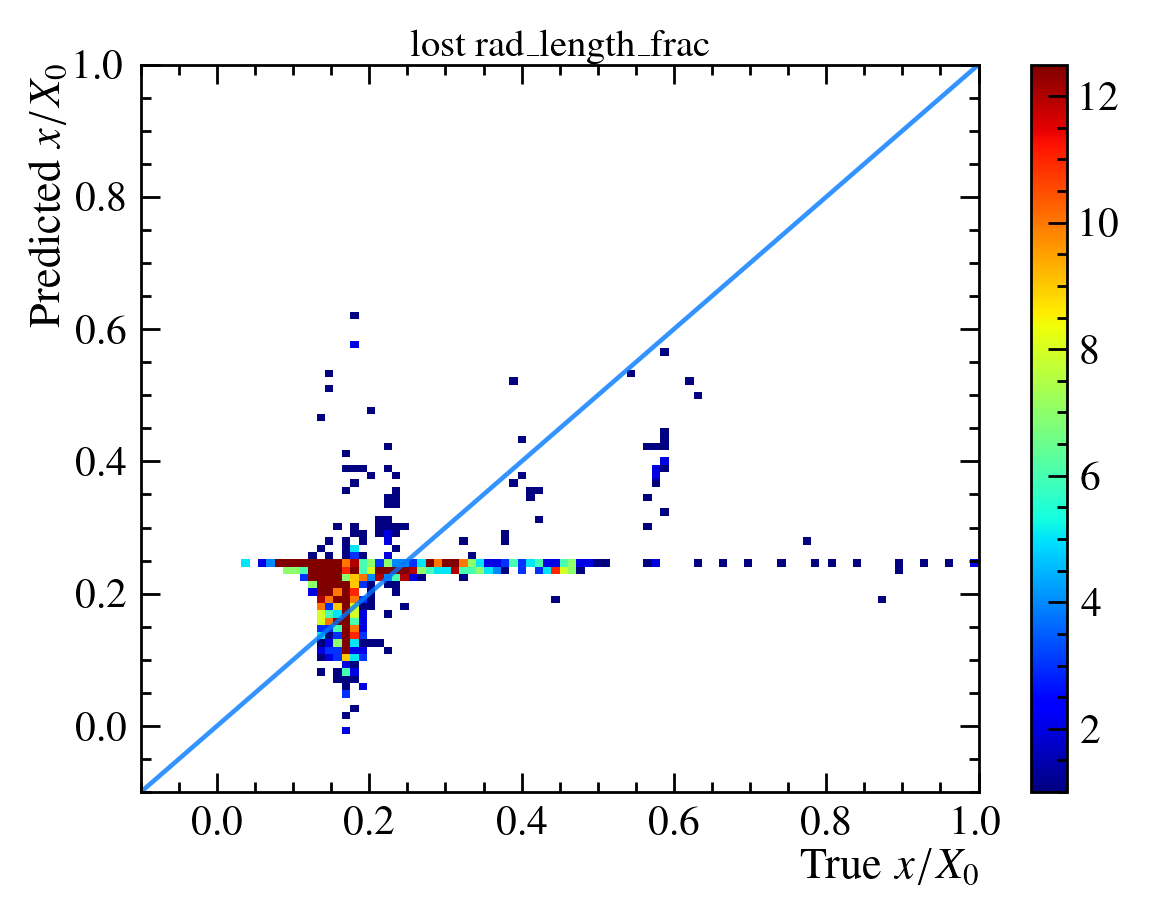

In [10]:
rad_length_frac = lost["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = lost["ideal_state_770_tx"]
    slopey = lost["ideal_state_770_ty"]
    x = lost["ideal_state_770_x"]
    y = lost["ideal_state_770_y"]
    qop = lost["ideal_state_770_qop"]
elif state == 2:
    slopex = lost["ideal_state_9410_tx"]
    slopey = lost["ideal_state_9410_ty"]
    x = lost["ideal_state_9410_x"]
    y = lost["ideal_state_9410_y"]
    qop = lost["ideal_state_9410_qop"]

data = ak.zip({
    "rad_length_frac": rad_length_frac,
    "x": x,
    "y": y,
    "tx": slopex,
    "ty": slopey,
    "qop": qop,
})
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 50

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[-0.1, 1.0], [-0.1, 1.0]],
)
plt.plot([-0.1, 1.0], [-0.1, 1.0], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"lost rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a0[3])
plt.show()

In [11]:
df = pd.DataFrame({
    "phi": phi_a * 90.0 / np.pi,
    "eta": eta_a * 2.0,
    "rad_length_frac": rad_length_frac_a,
})
df = df.round({"phi": 0, "eta": 1, "rad_length_frac": 4})
df

phi  eta  rad_length_frac
0     -87.0  7.0           0.1286
1      72.0  5.6           0.1478
2      55.0  5.0           0.1660
3      55.0  5.0           0.1660
4      11.0  8.4           0.1065
...     ...  ...              ...
48285 -81.0  7.7           0.1921
48286  35.0  7.6           0.2407
48287  63.0  7.2           0.2418
48288  13.0  6.2           0.1719
48289   0.0  4.8           0.1334

[48290 rows x 3 columns]

In [12]:
df_pivoted = df.pivot_table(
    index="eta",
    columns="phi",
    values="rad_length_frac",
    margins=False,
    # fill_value=0,
)

In [13]:
df_pivoted

phi    -90.0     -89.0     -88.0     -87.0     -86.0     -85.0     -84.0  \
eta                                                                        
4.0      NaN  0.137133  0.140800  0.137350  0.155200  0.160000  0.146800   
4.1   0.1510  0.137575  0.141467  0.137575  0.152850  0.160033  0.176100   
4.2   0.1322  0.137800       NaN  0.135900  0.141100  0.165500  0.149975   
4.3      NaN  0.135900  0.136300  0.135900  0.137788       NaN  0.153367   
4.4   0.1356  0.136075  0.139525  0.137800  0.138975  0.163250  0.153900   
...      ...       ...       ...       ...       ...       ...       ...   
9.6      NaN  0.092700  0.097750  0.099525  0.098250       NaN  0.092600   
9.7      NaN       NaN       NaN  0.098700  0.093400  0.090750  0.090000   
9.8   0.0922  0.092300  0.096600  0.089067  0.092600       NaN  0.080200   
9.9      NaN  0.090800  0.084900  0.076200       NaN  0.085500  0.090000   
10.0     NaN  0.191400       NaN  0.119100       NaN  0.178500       NaN   

phi      -83.0     -82.0     -81.0  ...     81.0      82.0      83.0  \
eta                                 ...                                
4.0   0.146500  0.164300  0.177060  ...  0.18345  0.176550  0.149900   
4.1   0.149350  0.173250  0.173386  ...  0.16720  0.169650  0.163200   
4.2   0.149429  0.152883  0.174633  ...  0.16582  0.155200  0.153533   
4.3   0.145900  0.146350  0.158700  ...  0.16390  0.148220  0.146367   
4.4   0.149725  0.147800  0.156467  ...  0.15555  0.149933  0.150256   
...        ...       ...       ...  ...      ...       ...       ...   
9.6   0.097100       NaN  0.093400  ...      NaN  0.090000  0.100500   
9.7   0.088100       NaN       NaN  ...  0.09120       NaN       NaN   
9.8   0.091950  0.090867       NaN  ...      NaN  0.076700       NaN   
9.9   0.098400  0.090000       NaN  ...  0.30180  0.089000  0.088900   
10.0       NaN       NaN       NaN  ...      NaN  0.104250  0.110900   

phi       84.0      85.0      86.0     87.0      88.0      89.0     90.0  
eta                                                                       
4.0   0.152733  0.161000  0.160900  0.13870  0.137400  0.137200  0.13425  
4.1   0.153900  0.157467  0.151300      NaN  0.136850  0.138880  0.13610  
4.2   0.147900  0.164650  0.140775  0.14170  0.137314  0.137133  0.13620  
4.3   0.147600  0.156067  0.141640  0.14135  0.136250  0.135740  0.13870  
4.4   0.158500  0.157440  0.137333  0.13620  0.136820  0.136467  0.14150  
...        ...       ...       ...      ...       ...       ...      ...  
9.6   0.095100  0.100500       NaN  0.09600  0.091850  0.094067      NaN  
9.7   0.093500  0.096200  0.097100      NaN  0.095400       NaN      NaN  
9.8   0.087750       NaN       NaN  0.09200  0.080300  0.100300      NaN  
9.9        NaN  0.090000       NaN      NaN  0.081600  0.088767      NaN  
10.0  0.085500       NaN       NaN      NaN       NaN  0.081500      NaN  

[61 rows x 181 columns]

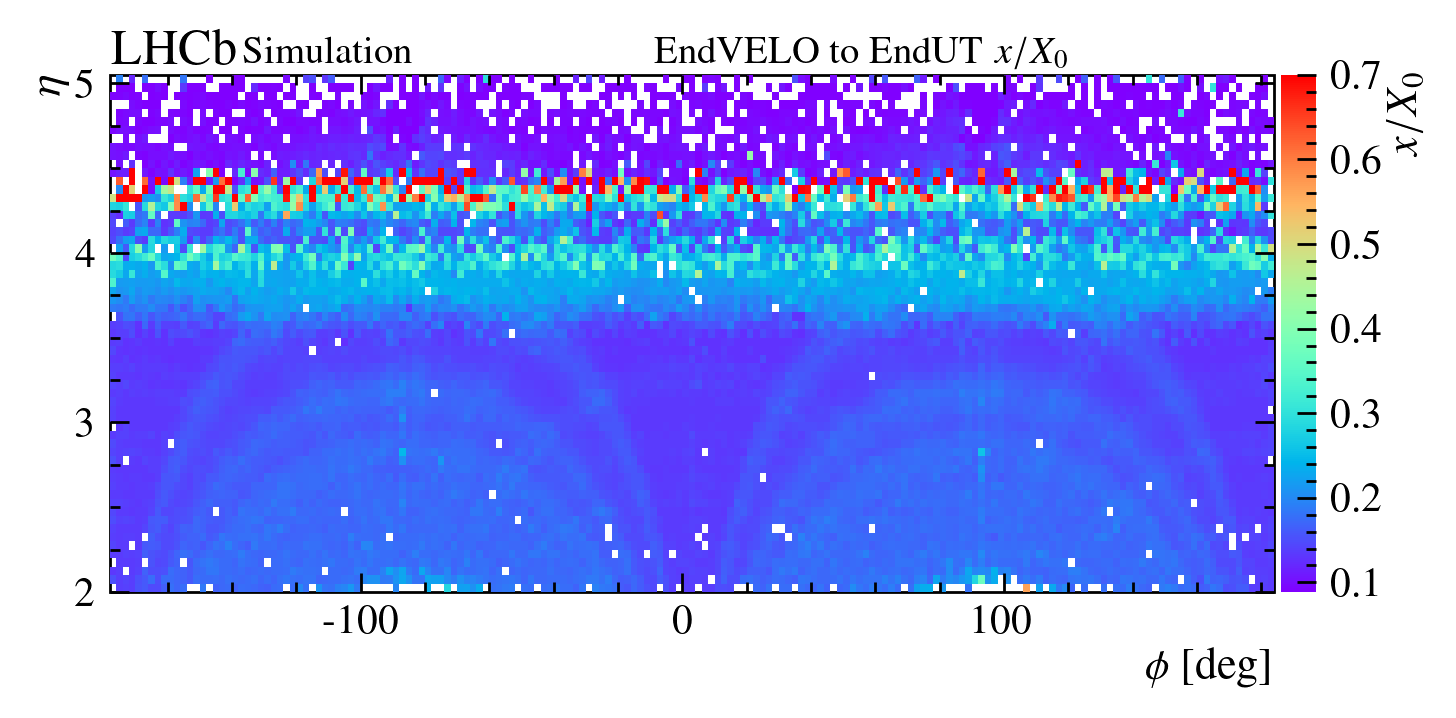

In [30]:
fig = plt.figure(figsize=(15, 7))
ax = sns.heatmap(
    df_pivoted,
    robust=True,
    square=False,
    cmap=colormaps["rainbow"],
    xticklabels=False,
    yticklabels=False,
    vmax=0.7,
    cbar_kws={
        "label": r"$x/X_0$",
        "pad": 0.005,
        "shrink": 1,
        "ticks": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
        "aspect": 15,
    },
)
# ax.set_yticks([5, 15, 25, 35], [2, 3, 4, 5])
ax.set_yticks([0, 20, 40, 60], [2, 3, 4, 5])
ax.set_xticks([39, 89, 139], [-100, 0, 100])  # ([79, 179, 279], [-100, 0, 100])
ax.set_xlabel(f"$\phi$ [deg]")
ax.set_ylabel(f"$\eta$")
ax.patch.set_edgecolor("black")

ax.patch.set_linewidth(2)
# ax.set_yticklabels([])
ax.invert_yaxis()
# ax.set_title("EndVELO to EndUT $x/X_0$", size=35)
mplhep.lhcb.text(
    "Simulation    \qquad \qquad \qquad    EndVELO to EndUT $x/X_0$", loc=0
)
# plt.show()
plt.savefig(
    "/work/cetin/Projektpraktikum/thesis/rad_length_frac_eta_phi_2.pdf", format="PDF"
)

In [19]:
# # make these smaller to increase the resolution
# dy, dx = 0.1, 1.0

# # generate 2 2d grids for the x & y bounds
# y, x = np.mgrid[slice(1.5, 5 + dy, dy), slice(-180, 180 + dx, dx)]

# plt.pcolormesh(x, y, df_pivoted, cmap=colormaps["jet"], vmax=0.7)

# plt.colorbar()
# plt.show()